Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
df=pd.read_csv('final_haralick_reduced.csv')
df

,Angular Second Momentum,Contrast,Correlation,Variance,Inv Diff Moment,Sum Avg,Entropy,info measure correlation1,info measure correlation2,Target
0,0.01015,135.19150,0.98946,6414.05507,0.30407,234.51310,11.03752,-0.44890,0.99913,0
1,0.01873,441.95107,0.96673,6643.79951,0.34234,184.16846,10.78333,-0.44216,0.99887,0
2,0.10442,386.96686,0.97581,7995.75022,0.44277,157.32084,9.16894,-0.45793,0.99779,0
3,0.00998,589.92963,0.95081,5997.66246,0.33334,177.00626,11.07169,-0.44521,0.99908,0
4,0.09590,113.81385,0.99285,7961.72046,0.39579,194.66891,9.66212,-0.45949,0.99841,0
...,...,...,...,...,...,...,...,...,...,...
423,0.06968,461.15009,0.93635,3656.26936,0.67364,56.67079,6.78050,-0.58536,0.99811,1
424,0.01897,187.39608,0.98439,5999.95008,0.54625,113.82462,8.78204,-0.55021,0.99934,1
425,0.01071,633.80351,0.95138,6521.68113,0.34056,177.34390,11.04060,-0.44609,0.99906,1
426,0.02935,462.38468,0.95931,5687.21328,0.46093,121.33385,9.64733,-0.50675,0.99925,1


In [2]:
def accuracy(y_true,y_pred):
    accuracy=np.sum(y_true==y_pred)/len(y_true)
    return accuracy 

In [3]:
def loss(h , y) : 
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).sum()

In [4]:
def evaluate(y_pred , y):
    k=0
    tp=0
    fp=0
    fn=0
    tn=0
    for x in y_pred :
        if x==1:
            if y[k] == 1:
                tp+=1
            else:
                fp+=1
        else:
            if y[k] == 1:
                fn+=1
            else:
                tn+=1
        k+=1
    return tp,fp,tn,fn

In [5]:
class LogisticRegression:
  def __init__(self,lr,iters):
    self.lr=lr
    self.iters=iters
    self.weights=None
    self.bias=None
    self.historyGD={}
    self.historyGD['accuracy']=[]
    self.historyGD['loss']=[]
    self.historySGD={}
    self.historySGD['accuracy']=[]
    self.historySGD['loss']=[]
    self.tp=0
    self.tn=0
    self.fp=0
    self.fn=0
  
  def fit_gd(self,x,y):
    n,m=x.shape      #n=samples,m=features
    self.weights=np.zeros(m)
    self.bias=0
    y = y.reshape((y.shape[0],))

    for _ in range(self.iters):
      linear_model=np.dot(x,self.weights)+self.bias
      y_pred=self.sigmoid(linear_model)
      dw=(1/n)*(np.dot(x.T,(y_pred-y)))
      db=(1/n)*(np.sum(y_pred-y))

      self.weights -=self.lr*dw
      self.bias -=self.lr*db

      if(_%50==0):
        y_pred__=self.predict(x)
        self.historyGD['loss'].append(loss(y_pred , y))
        self.historyGD['accuracy'].append(((y_pred__ == y).sum()/len(y)))
        #print(y.shape,y_pred.shape,np.sum(y==y_pred),accuracy(y,y_pred))
    return self.weights
   
  def fit_sgd(self,x,y):
    n,m=x.shape  #n=samples m=features
    self.weights=np.zeros(m)
    self.bias=0
    y = y.reshape((y.shape[0],))
    
    for _ in range(self.iters):
      random_number=random.randint(0,len(y)-1)
      x_b, y_b = x[random_number], y[random_number]

      linear_model=np.dot(x_b,self.weights)+self.bias
      y_pred=self.sigmoid(linear_model)
      dw=(np.dot(x_b.T,(y_pred-y_b)))
      db=(np.sum(y_pred-y_b))
      
      self.weights -=self.lr*dw
      self.bias -=self.lr*db
      if(_%50==0):
        y_pred__=self.predict(x)
        tp,fp,tn,fn = evaluate(y_pred__ , y)
        self.historySGD['loss'].append(loss(y_pred , y_b))
        self.historySGD['accuracy'].append((tp+tn)/(tp+tn+fp+fn)) 
    return self.weights
    
  
  def predict(self,x):
    linear_model=np.dot(x,self.weights)+self.bias
    y_pred=self.sigmoid(linear_model)
    y_pred_class=[1 if i>0.5 else 0 for i in y_pred]
    return y_pred_class

  def sigmoid(self,x):
    return 1/(1+np.exp(-x))

  def get_weights(self):
    return self.weights 



#GD Result

In [6]:
accuracy_avg=[]
loss_avg=[]
for i in range(10):
  x=df.iloc[:,:-1]
  y=df.iloc[:,-1]
  x=(x-x.mean(axis=0))/x.std(axis=0)
  rows = int(x.shape[0] * 0.7)
  indices = np.arange(x.shape[0])
  np.random.seed()
  np.random.shuffle(indices)
  train = indices[:rows]
  test = indices[rows:]
  x_train=x.iloc[train]
  x_test =x.iloc[test]
  y_train=y.iloc[train]
  y_test =y.iloc[test]

  x_train=x_train.to_numpy()
  y_train=y_train.to_numpy()
  x_test=x_test.to_numpy()
  y_test=y_test.to_numpy()

  regressor=LogisticRegression(lr=0.01,iters=100000)
  weights=regressor.fit_gd(x_train,y_train)
  y_predicted=regressor.predict(x_test)
  score=accuracy(y_predicted,y_test)
  accuracy_avg.append(score)
  losses=regressor.historyGD['loss']
  loss_avg.append(losses[-1])
  tp,tn,fp,fn=evaluate(y_predicted,y_test)
  recall=tp/(tp+fn)
  f1=tp/(tp+0.5*(fp+fn))
  precision=tp/(tp+fp)

In [7]:
print(accuracy_avg)
print(loss_avg)
print('Average Accuracy=',np.mean(accuracy_avg))
print('Average Loss=',np.mean(loss_avg))
print('Recall=',recall)
print('F1=',f1)
print("Precision=",precision)

[0.8217054263565892, 0.8527131782945736, 0.8294573643410853, 0.8217054263565892, 0.8217054263565892, 0.813953488372093, 0.8604651162790697, 0.875968992248062, 0.8294573643410853, 0.7906976744186046]
[104.86070863952955, 109.01595949645446, 103.34253161960964, 98.26585165087158, 104.15393183460768, 97.5463898350811, 104.08622657546661, 109.53803796589827, 102.83791906291702, 100.1980314621878]
Average Accuracy= 0.831782945736434
Average Loss= 103.38455881426236
Recall= 0.75
F1= 0.5783132530120482
Precision= 0.47058823529411764


In [8]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print(precision_score(y_test,y_predicted))
print(recall_score(y_test,y_predicted))
print(f1_score(y_test,y_predicted))

0.8135593220338984
0.75
0.7804878048780488


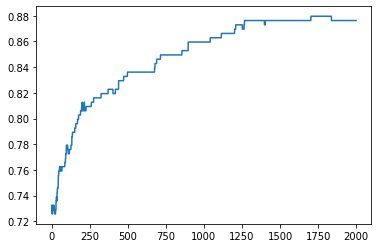

In [9]:
plt.plot(regressor.historyGD['accuracy'],label='Accuracy')

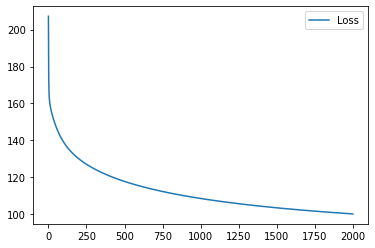

In [10]:
plt.plot(regressor.historyGD['loss'],label='Loss')
plt.legend()

In [11]:
weights=regressor.get_weights()
weights

array([-1.64685083,  0.53476582,  0.15331188, -1.90650238,  9.18677068,
        3.72709284,  4.06074342,  0.28593556, -2.37682874])

#SGD Result

In [12]:
accuracy_avg1=[]
loss_avg1=[]
for i in range(10):
  x=df.iloc[:,:-1]
  y=df.iloc[:,-1]
  x=(x-x.mean(axis=0))/x.std(axis=0)
  rows = int(x.shape[0] * 0.7)
  indices = np.arange(x.shape[0])
  np.random.seed()
  np.random.shuffle(indices)
  train = indices[:rows]
  test = indices[rows:]
  x_train=x.iloc[train]
  x_test =x.iloc[test]
  y_train=y.iloc[train]
  y_test =y.iloc[test]

  x_train=x_train.to_numpy()
  y_train=y_train.to_numpy()
  x_test=x_test.to_numpy()
  y_test=y_test.to_numpy()

  regressor1=LogisticRegression(lr=0.01,iters=100000)
  weights=regressor1.fit_sgd(x_train,y_train)
  y_predicted=regressor1.predict(x_test)

  score1=regressor1.historySGD['accuracy']
  accuracy_avg1.append(score1[-1])
  losses1=regressor1.historySGD['loss']
  loss_avg1.append(losses1[-1])

  tp1,tn1,fp1,fn1=evaluate(y_predicted,y_test)
  recall1=tp1/(tp1+fn1)
  f1=tp1/(tp1+0.5*(fp1+fn1))
  precision1=tp1/(tp1+fp1)

In [13]:
print(accuracy_avg1)
print(loss_avg1)
print('Average Accuracy=',np.mean(accuracy_avg1))
print('Average Loss=',np.mean(loss_avg1))
print('Recall=',recall1)
print('FSCore=',f1)
print('Precision=',precision1)

[0.8394648829431438, 0.8461538461538461, 0.842809364548495, 0.862876254180602, 0.8662207357859532, 0.8595317725752508, 0.8528428093645485, 0.8528428093645485, 0.8294314381270903, 0.862876254180602]
[0.2869336875673432, 0.07127175929051066, 0.00589973344450691, 0.09118840960153445, 0.6721982379007229, 0.17162717857974696, 0.01781707496013685, 0.7576631892857055, 0.09716308736113317, 0.02152825103887669]
Average Accuracy= 0.8515050167224081
Average Loss= 0.2193290609030217
Recall= 0.8311688311688312
FSCore= 0.6881720430107527
Precision= 0.5871559633027523


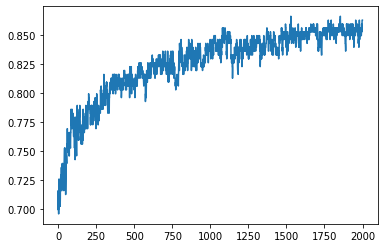

In [14]:
plt.plot(regressor1.historySGD['accuracy'],label='Accuracy')

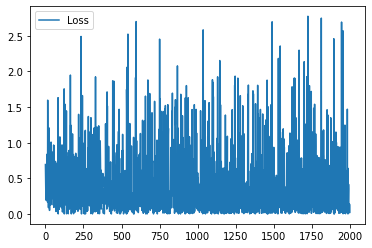

In [15]:
plt.plot(regressor1.historySGD['loss'],label='Loss')
plt.legend()

In [16]:
weight=regressor1.get_weights()
weight

array([-1.65648923,  0.89580317,  0.64927631, -1.84505278,  9.06499903,
        3.35793585,  3.95397963,  0.67895339, -1.56438106])

#Accuracy Plot for LR variation

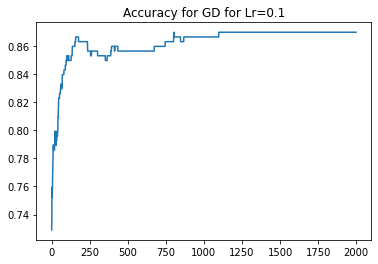

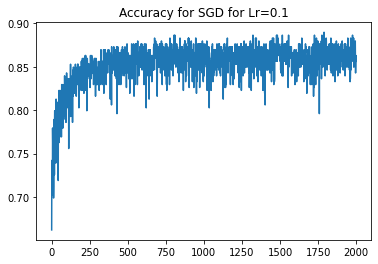

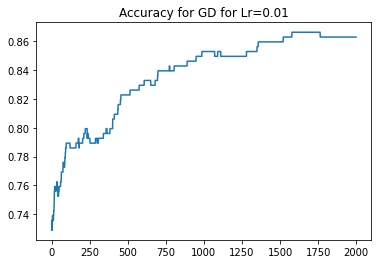

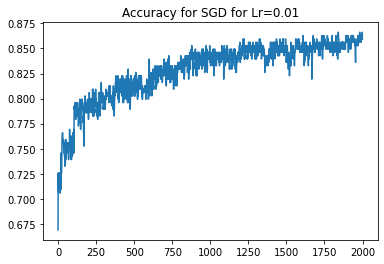

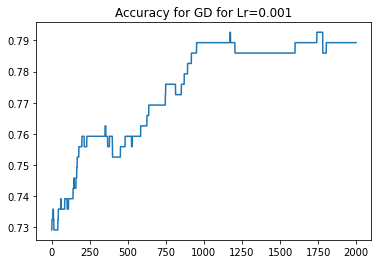

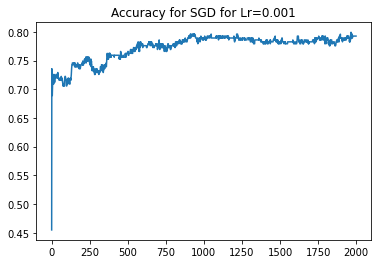

In [17]:
lr=[0.1,0.01,0.001]
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x=(x-x.mean(axis=0))/x.std(axis=0)
rows = int(x.shape[0] * 0.7)
indices = np.arange(x.shape[0])
np.random.seed()
np.random.shuffle(indices)
train = indices[:rows]
test = indices[rows:]
x_train=x.iloc[train]
x_test =x.iloc[test]
y_train=y.iloc[train]
y_test =y.iloc[test]

x_train=x_train.to_numpy()
y_train=y_train.to_numpy()
x_test=x_test.to_numpy()
y_test=y_test.to_numpy()

for i in lr:
  regressorGD=LogisticRegression(lr=i,iters=100000)
  weight=regressorGD.fit_gd(x_train,y_train)
  y_predicted=regressorGD.predict(x_test)
  plt.plot(regressorGD.historyGD['accuracy'])
  plt.title('Accuracy for GD for Lr='+str(i))
  plt.show()
  regressorSGD=LogisticRegression(lr=i,iters=100000)
  weights=regressorSGD.fit_sgd(x_train,y_train)
  y_predicted1=regressorSGD.predict(x_test)
  plt.plot(regressorSGD.historySGD['accuracy'])
  plt.title('Accuracy for SGD for Lr='+str(i))
  plt.show()
  